<a href="https://colab.research.google.com/github/YaninaDitz/Coderhouse/blob/main/ProyectoDS_ParteIV_Ditz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto: Predicción de pérdidas de clientes**
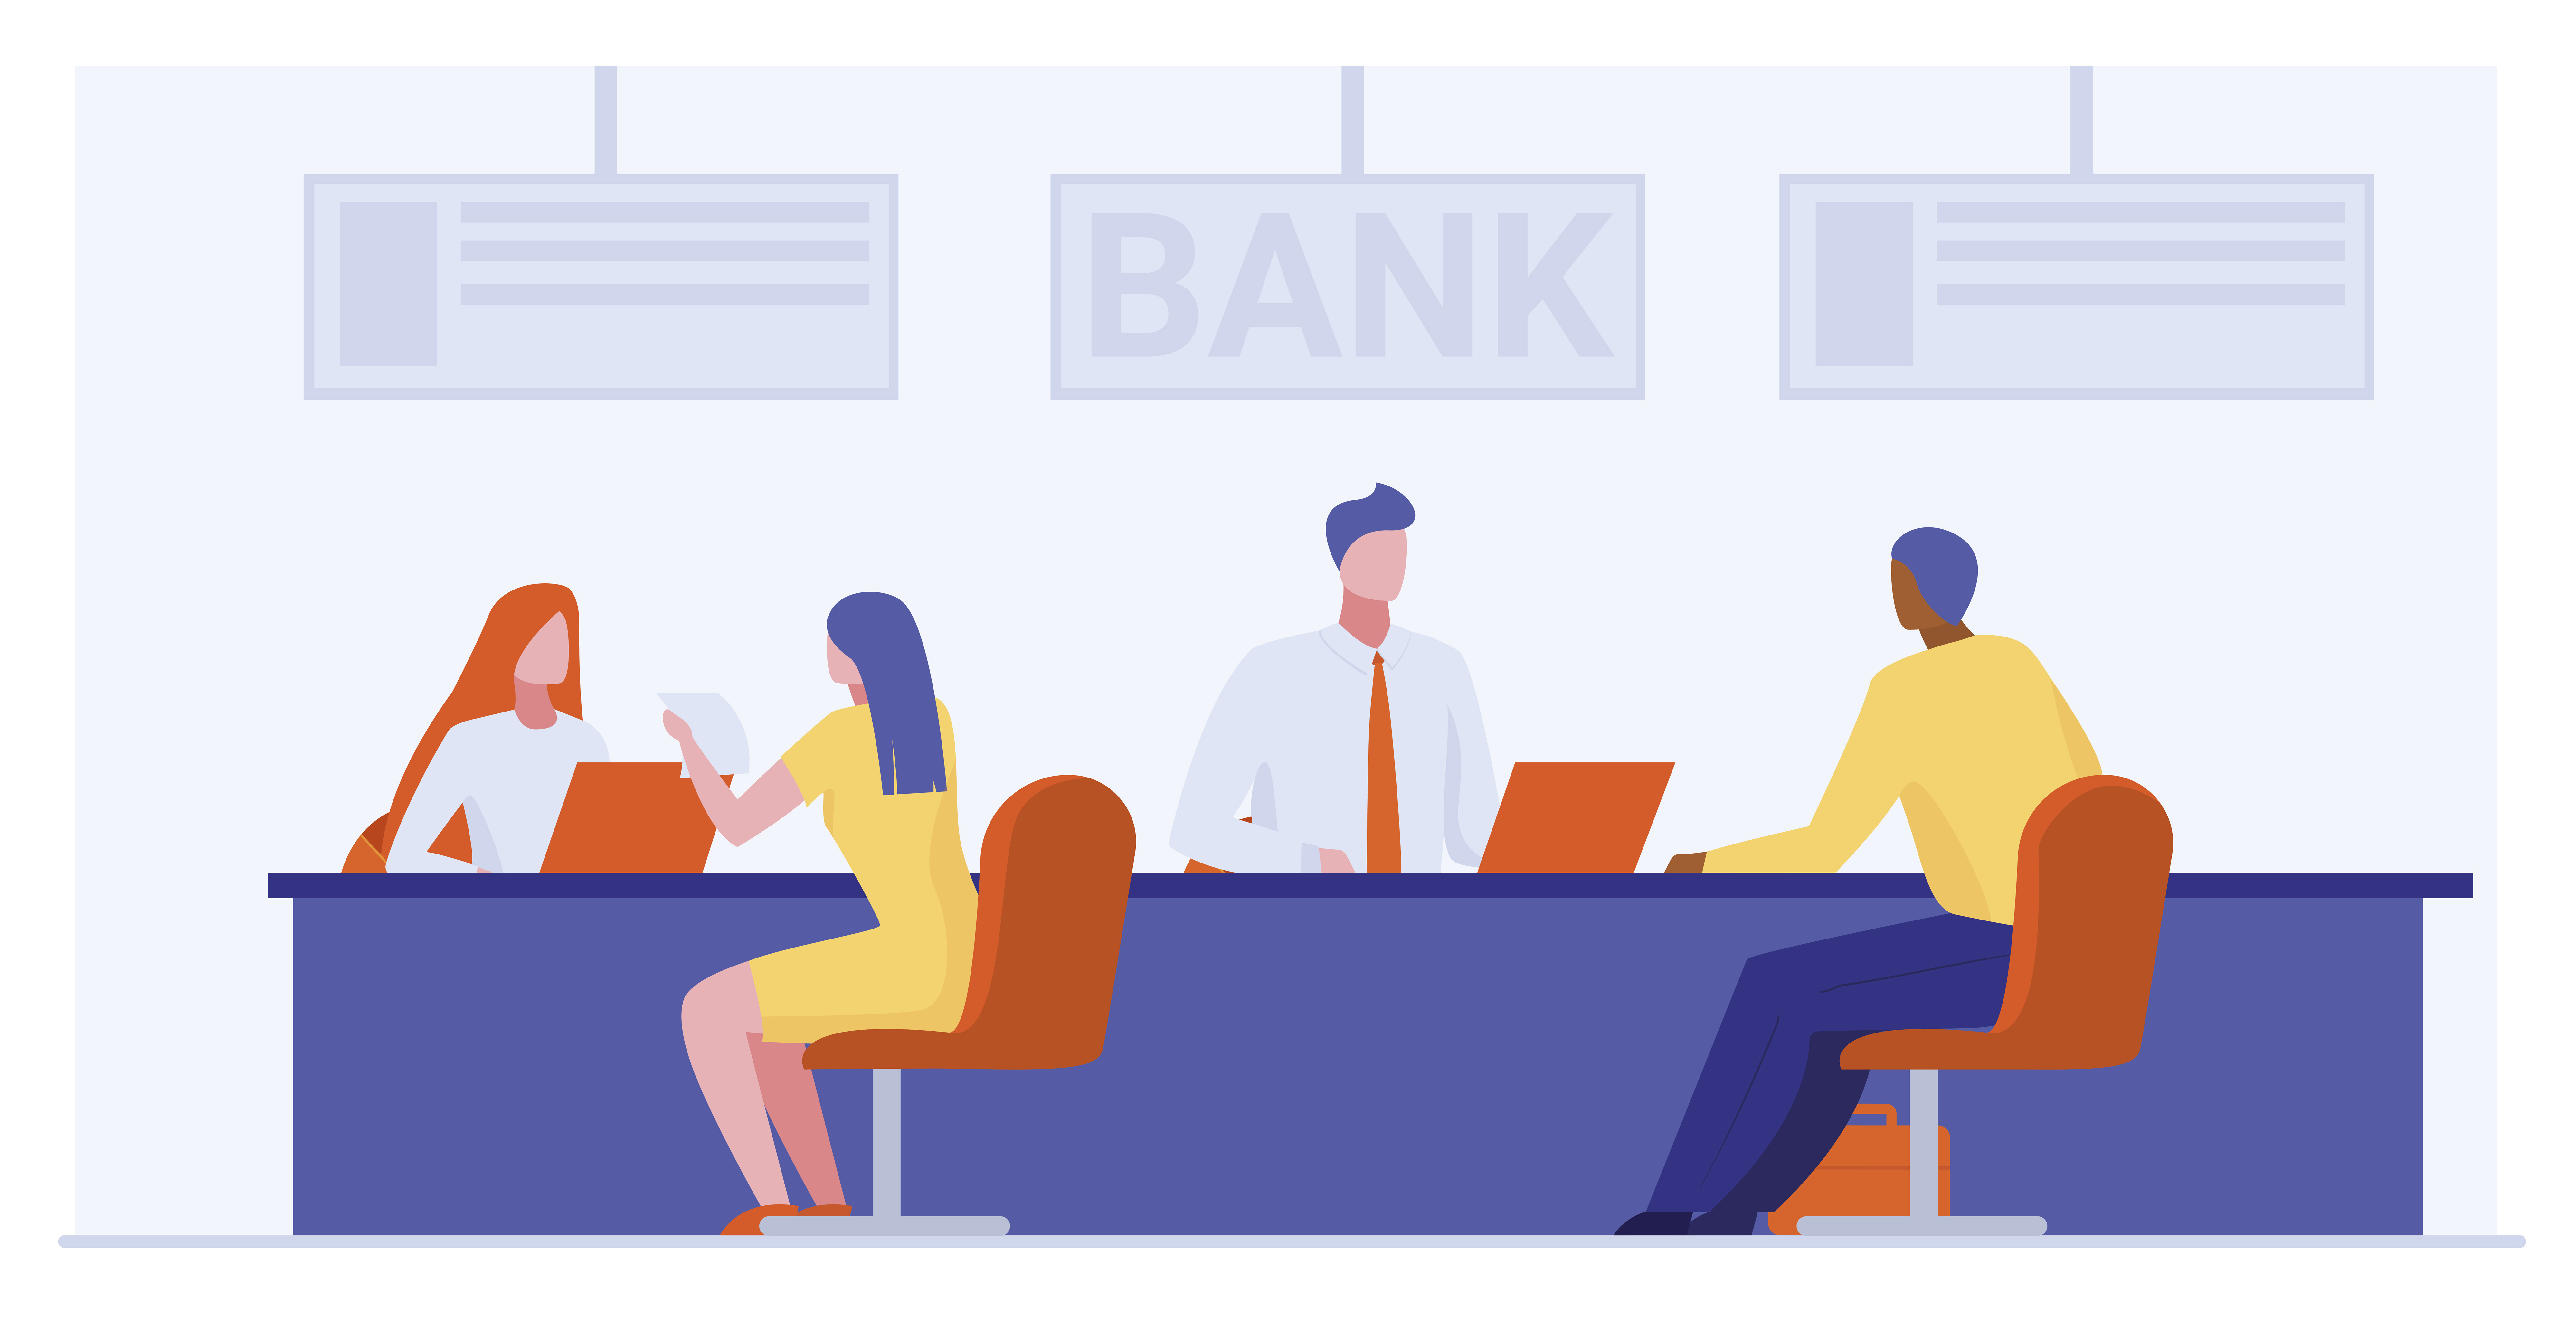

## 1. Descripción
El problema consiste en desarrollar un modelo de predicción de abandono de clientes para un banco. El objetivo es identificar a los clientes que tienen una alta probabilidad de abandonar los servicios del banco en un futuro cercano. Esta información permitirá a la institución financiera tomar medidas proactivas para retener a esos clientes, lo que a su vez puede ayudar a reducir la pérdida de ingresos y fortalecer la relación con los clientes.

---

## Datos disponibles
El banco ha recopilado un conjunto de datos históricos que contiene información relevante sobre los clientes, incluyendo características demográficas, comportamiento financiero, historial de transacciones y productos utilizados. Algunos de los atributos disponibles que se incluyen son la edad, el género, el estado civil, el nivel de ingresos, el saldo de la cuenta, la frecuencia de transacciones, los productos contratados, entre otros.

---

## Audiencia
Este proyecto está dirigido a cualquier persona interesada en aprender técnicas de análisis de datos y modelado predictivo. También incluiría a los líderes y gerentes del banco, analistas y científicos de datos, equipos de marketing y retención de clientes, y representantes de atención al cliente. Todos estos grupos se beneficiarían de la aplicación de técnicas de predicción de abandono de clientes para mejorar la retención, la satisfacción del cliente y los resultados comerciales del banco.

---

## Problema
En cualquier negocio se quiere entender el ciclo de vida del cliente e implantar metodologías para evitar que se vaya. Normalmente, en los servicios financieros, se observa que los clientes empiezan a desvincularse antes de cerrar realmente sus productos, y este es el punto en el que hay que intervenir. En este análisis se estudiarán los factores que parecen influir en el abandono de un cliente.
El principal interés es obtener un entendimiento de cómo los atributos dados se relacionan con el status "Attrited Customer", es decir aquellos que abandonan el banco.

Algunas preguntas específicas que buscamos responder son:
* ¿Cuáles son los factores que influyen en la tasa de abandono de los clientes?
* ¿Hay alguna relación entre la transacciones y la tasa de abandono?
* ¿Cómo afecta el límite del crédito a la tasa de abandono?
* ¿Qué tan precisos son los modelos de predicción para identificar a los clientes con mayor probabilidad de abandonar?

Tras un análisis exploratorio de los datos, se creará un modelo de predicción con métodos de aprendizaje automático para abordar estas preguntas y se evaluará su precisión. Para aumentar aún más la precisión del modelo, se aplicarán métodos de optimización de hiperparámetros. A continuación, se elegirá el mejor modelo y se harán sugerencias para reducir la tasa de rotación de clientes.

---

**Autor:** Yanina Ditz

**E-mail:** yaniditz@gmail.com

## 2. Librerías

In [2]:
# Librerias de manipulación de datos y visualización
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import seaborn as sns
from scipy import stats


In [3]:
# Definición de colores y estilo
sns.set_palette("pastel")
sns.set_style("whitegrid")

plt.style.use('ggplot')
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

## 3. Cargo los datos


In [4]:
df_bank=pd.read_csv('https://raw.githubusercontent.com/YaninaDitz/Coder/main/BankChurners.csv')
df_bank=df_bank[df_bank.columns[:-2]]
df_bank.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
import random

# Lista de lugares de EE. UU.
lugares_usa = [
    "Nueva York",
    "Los Ángeles",
    "Chicago",
    "Houston",
    "Phoenix",
    "Filadelfia",
    "San Antonio",
    "San Diego",
    "Dallas",
    "San José"
]


# Generar una lista de lugares aleatorios
lugares_aleatorios = random.choices(lugares_usa, k=10127)

# Agregar el campo "location" al DataFrame
df_bank["location"] = lugares_aleatorios

# Imprimir el DataFrame resultante
df_bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,location
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,Los Ángeles
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,San Antonio
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,San José
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,Dallas
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,Dallas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,San Diego
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,Houston
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,Chicago
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,San Diego


In [6]:
#Cargo el df que contiene los paises o estados de EE.UU
df=pd.read_csv('https://raw.githubusercontent.com/YaninaDitz/Coder/main/df.csv')

In [7]:
# Agregar una columna para generar un índice de muestra aleatorio
df["random_index"] = np.random.rand(len(df))

# Ordenar el DataFrame generado por el índice de muestra aleatorio
df = df.sort_values("random_index").reset_index(drop=True)
# Obtener una muestra aleatoria del DataFrame generado
muestra_aleatoria = df.sample(n=len(df_bank), replace=True)

# Concatenar el DataFrame existente con la muestra aleatoria
df_final =pd.merge(df_bank, muestra_aleatoria[["location", "latitud", "longitud"]], how="left", on="location")

# Verificar el DataFrame resultante
df_final.drop_duplicates(inplace=True)
df_final



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,location,latitud,longitud
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,Los Ángeles,34.055130,-118.257030
993,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,San Antonio,29.374994,-98.588562
1990,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,San José,37.354559,-121.883844
3032,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,Dallas,32.736212,-96.784359
4065,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,Dallas,32.736212,-96.784359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10249657,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,1851,2152.0,0.703,15476,117,0.857,0.462,San Diego,32.727930,-117.155290
10250663,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2186,2091.0,0.804,8764,69,0.683,0.511,Houston,29.784753,-95.361416
10251713,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0,5409.0,0.819,10291,60,0.818,0.000,Chicago,41.878970,-87.660630
10252738,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0,5281.0,0.535,8395,62,0.722,0.000,San Diego,32.727930,-117.155290


In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10253744
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Tot

### 3.1 Datos disponibles - Atributos
1 CLIENTNUM: ID para cada cliente. (Integer)

2 Attrition_Flag: Marca que indica si el cliente produce o no. (Boolean)

3 Customer_Age: Edad del cliente. (Integer)

4 Gender: Género del cliente. (String)

5 Dependent_count: Cantidad de personas a cargo que tiene. (Integer)

6 Education_Level: Nivel de educación del cliente. (String)

7 Marital_Status: Estado civil del cliente. (String)

8 Income_Category: Categoría de ingresos del cliente. (String)

9 Card_Category: Tipo de tarjeta del cliente. (String)

10 Months_on_book:Cuánto tiempo el cliente ha estado en los libros (Integer)

11 Total_Relationship_Count: Número total de relaciones que el cliente tiene con el proveedor de la tarjeta de crédito. (Integer)

12 Months_Inactive_12_mon: Número de meses que el cliente ha estado inactivo en los últimos doce meses. (Integer)

13 Contacts_Count_12_mon:Número de contactos que ha tenido el cliente en los últimos doce meses. (Integer)

14 Credit_Limit: Límite de crédito del cliente. (float)

15 Total_Revolving_Bal: Saldo renovable total del cliente. (Integer)

16 Avg_Open_To_Buy: Ratio medio de apertura a la compra del cliente. (float)

17 Total_Amt_Chng_Q4_Q1: Importe total cambiado del trimestre 4 al trimestre 1. (float)

18 Total_Trans_Amt: Importe total de transacciones. (Integer)

19 Total_Trans_Ct: Número total de transacciones. (Integer)

20 Total_Ct_Chng_Q4_Q1: El recuento total cambió del cuarto al primer trimestre. (float)

21 Avg_Utilization_Ratio: Ratio medio de utilización del cliente. (float)

22 Location: Locacion (Lugar de USA) (String)

23 Latitud: Latitud (float)

24 Longitud: Longitud (float)

## 4. Pre - procesamiento (Parte I)

### 4.1 Evaluando valores únicos

In [9]:
df_final['CLIENTNUM'].nunique()

10127

In [10]:
df_final["location"].nunique()

10

In [11]:
# Obtener los valores únicos de location con sus respectivas latitudes y longitudes
df_valores_unicos = df_final.drop_duplicates(subset=["location"])[["location", "latitud", "longitud"]]

# Imprimir el DataFrame con los valores únicos
df_valores_unicos.head(10)

,location,latitud,longitud
0,Los Ángeles,34.055130,-118.257030
993,San Antonio,29.374994,-98.588562
1990,San José,37.354559,-121.883844
3032,Dallas,32.736212,-96.784359
5098,Chicago,41.878970,-87.660630
7120,Houston,29.784753,-95.361416
11193,Nueva York,40.682950,-73.970800
18138,Phoenix,33.605030,-112.070892
21185,San Diego,32.727930,-117.155290
45756,Filadelfia,39.990821,-75.168428


### 4.2 Eliminar variables

In [12]:
df_final.drop(columns=['CLIENTNUM'],inplace=True)

### 4.3 Missing Data

In [13]:
missing_data = df_final.isnull()
missing_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,location,latitud,longitud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
993,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3032,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4065,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
missing_data.sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
location                    0
latitud                     0
longitud                    0
dtype: int64

No se observan valores faltantes

### 4.4 Tipo de dato

In [15]:
df_final.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
location                     object
latitud                     float64
longitud                    float64
dtype: object

### 4.5 Convertir variables

Convierto las coumnas convenientes a dtypes, "pasando" de booleanos y objeto a categóricas.

In [16]:
cat_types = ['bool','object','category']
data_clean = df_final.copy()
data_clean[data_clean.select_dtypes(cat_types).columns] = data_clean.select_dtypes(cat_types).apply(lambda x: x.astype('category'))

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10253744
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  i

## 5. Análisis exploratotiro de los datos - EDA

### 5.1 Análisis descriptivo

Análisis descriptivo de las variables cuantitativas.

In [17]:
data_clean.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,latitud,longitud
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,35.270100,-99.732680
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,4.235476,16.583194
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,29.374994,-121.883844
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,32.727930,-117.155290
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,33.605030,-96.784359
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,39.990821,-87.660630
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,41.878970,-73.970800


Análisis descriptivo para las variables categóricas.


In [18]:
data_clean.describe(include=['category'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,location
count,10127,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4,10
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue,Phoenix
freq,8500,5358,3128,4687,3561,9436,1067


### 5.2 Análisis de valores atípicos

In [19]:
#Seleccionamos las variables numéricas
for col_num in data_clean.select_dtypes('int64').columns.to_list():
    print(col_num)

Customer_Age
Dependent_count
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Total_Revolving_Bal
Total_Trans_Amt
Total_Trans_Ct


In [20]:
#Seleccionamos las variables numéricas
for col_num in data_clean.select_dtypes('float64').columns.to_list():
    print(col_num)

Credit_Limit
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
latitud
longitud


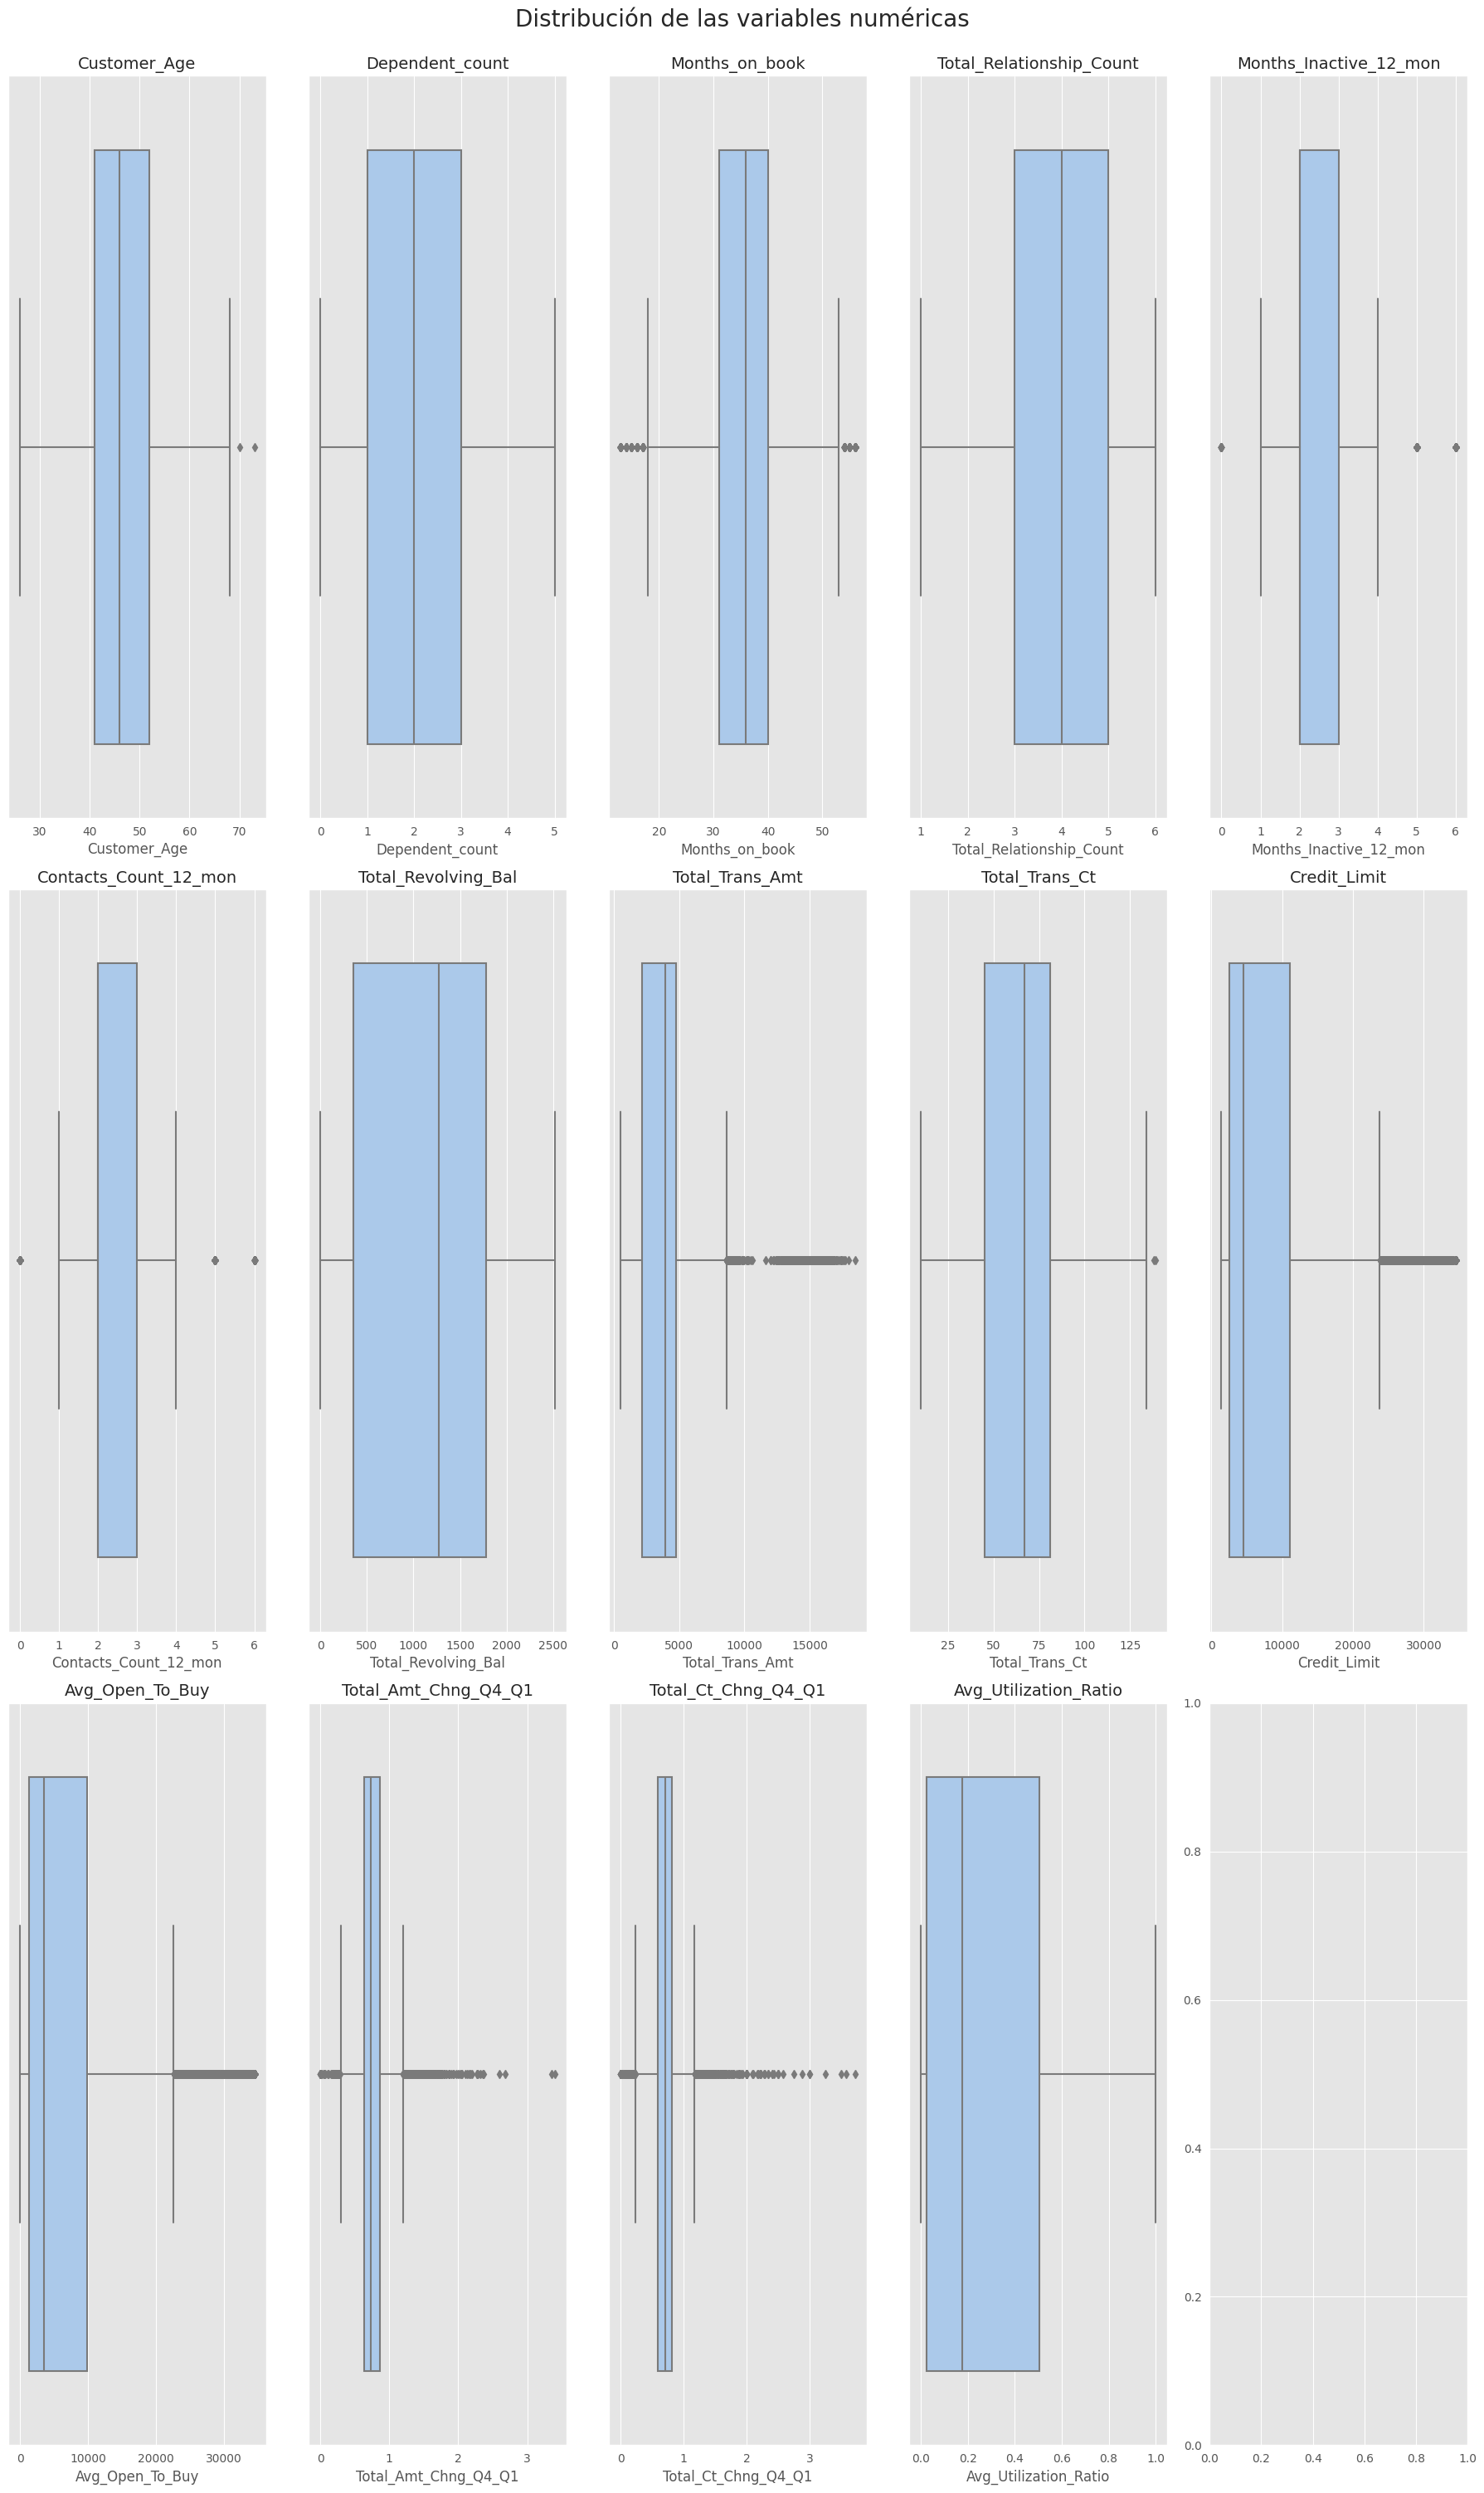

In [21]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(18, 30))
fig.suptitle('Distribución de las variables numéricas', fontsize=20, y=1.0)

# Variables numéricas
num_cols = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
'Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct',
'Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
for i, col in enumerate(num_cols):
    row = i // 5
    pos = i % 5
    if row<6:
        sns.boxplot(x=col, data=data_clean, ax=axs[row][pos], palette='pastel')
        axs[row][pos].set_title(col, fontsize=14)

plt.tight_layout()
plt.show()

### 5.3 Distribución de variables numéricas

<ipython-input-22-84b282eef67b>:12: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Media de Customer_Age: 46.32596030413745
Media de Dependent_count: 2.3462032191172115


<ipython-input-22-84b282eef67b>:12: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-22-84b282eef67b>:12: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Media de Months_on_book: 35.928409203120374
Media de Total_Relationship_Count: 3.8125802310654686


<ipython-input-22-84b282eef67b>:12: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-22-84b282eef67b>:12: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Media de Months_Inactive_12_mon: 2.3411671768539546


<ipython-input-22-84b282eef67b>:12: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Media de Contacts_Count_12_mon: 2.4553174681544387
Media de Total_Revolving_Bal: 1162.8140614199665


<ipython-input-22-84b282eef67b>:12: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-22-84b282eef67b>:12: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Media de Total_Trans_Amt: 4404.086303939963
Media de Total_Trans_Ct: 64.85869457884863


<ipython-input-22-84b282eef67b>:12: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-22-84b282eef67b>:12: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Media de Credit_Limit: 8631.953698034955
Media de Avg_Open_To_Buy: 7469.139636614989


<ipython-input-22-84b282eef67b>:12: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-22-84b282eef67b>:12: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Media de Total_Amt_Chng_Q4_Q1: 0.7599406536980349


<ipython-input-22-84b282eef67b>:12: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Media de Total_Ct_Chng_Q4_Q1: 0.7122223758269972
Media de Avg_Utilization_Ratio: 0.2748935518909845


<ipython-input-22-84b282eef67b>:12: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



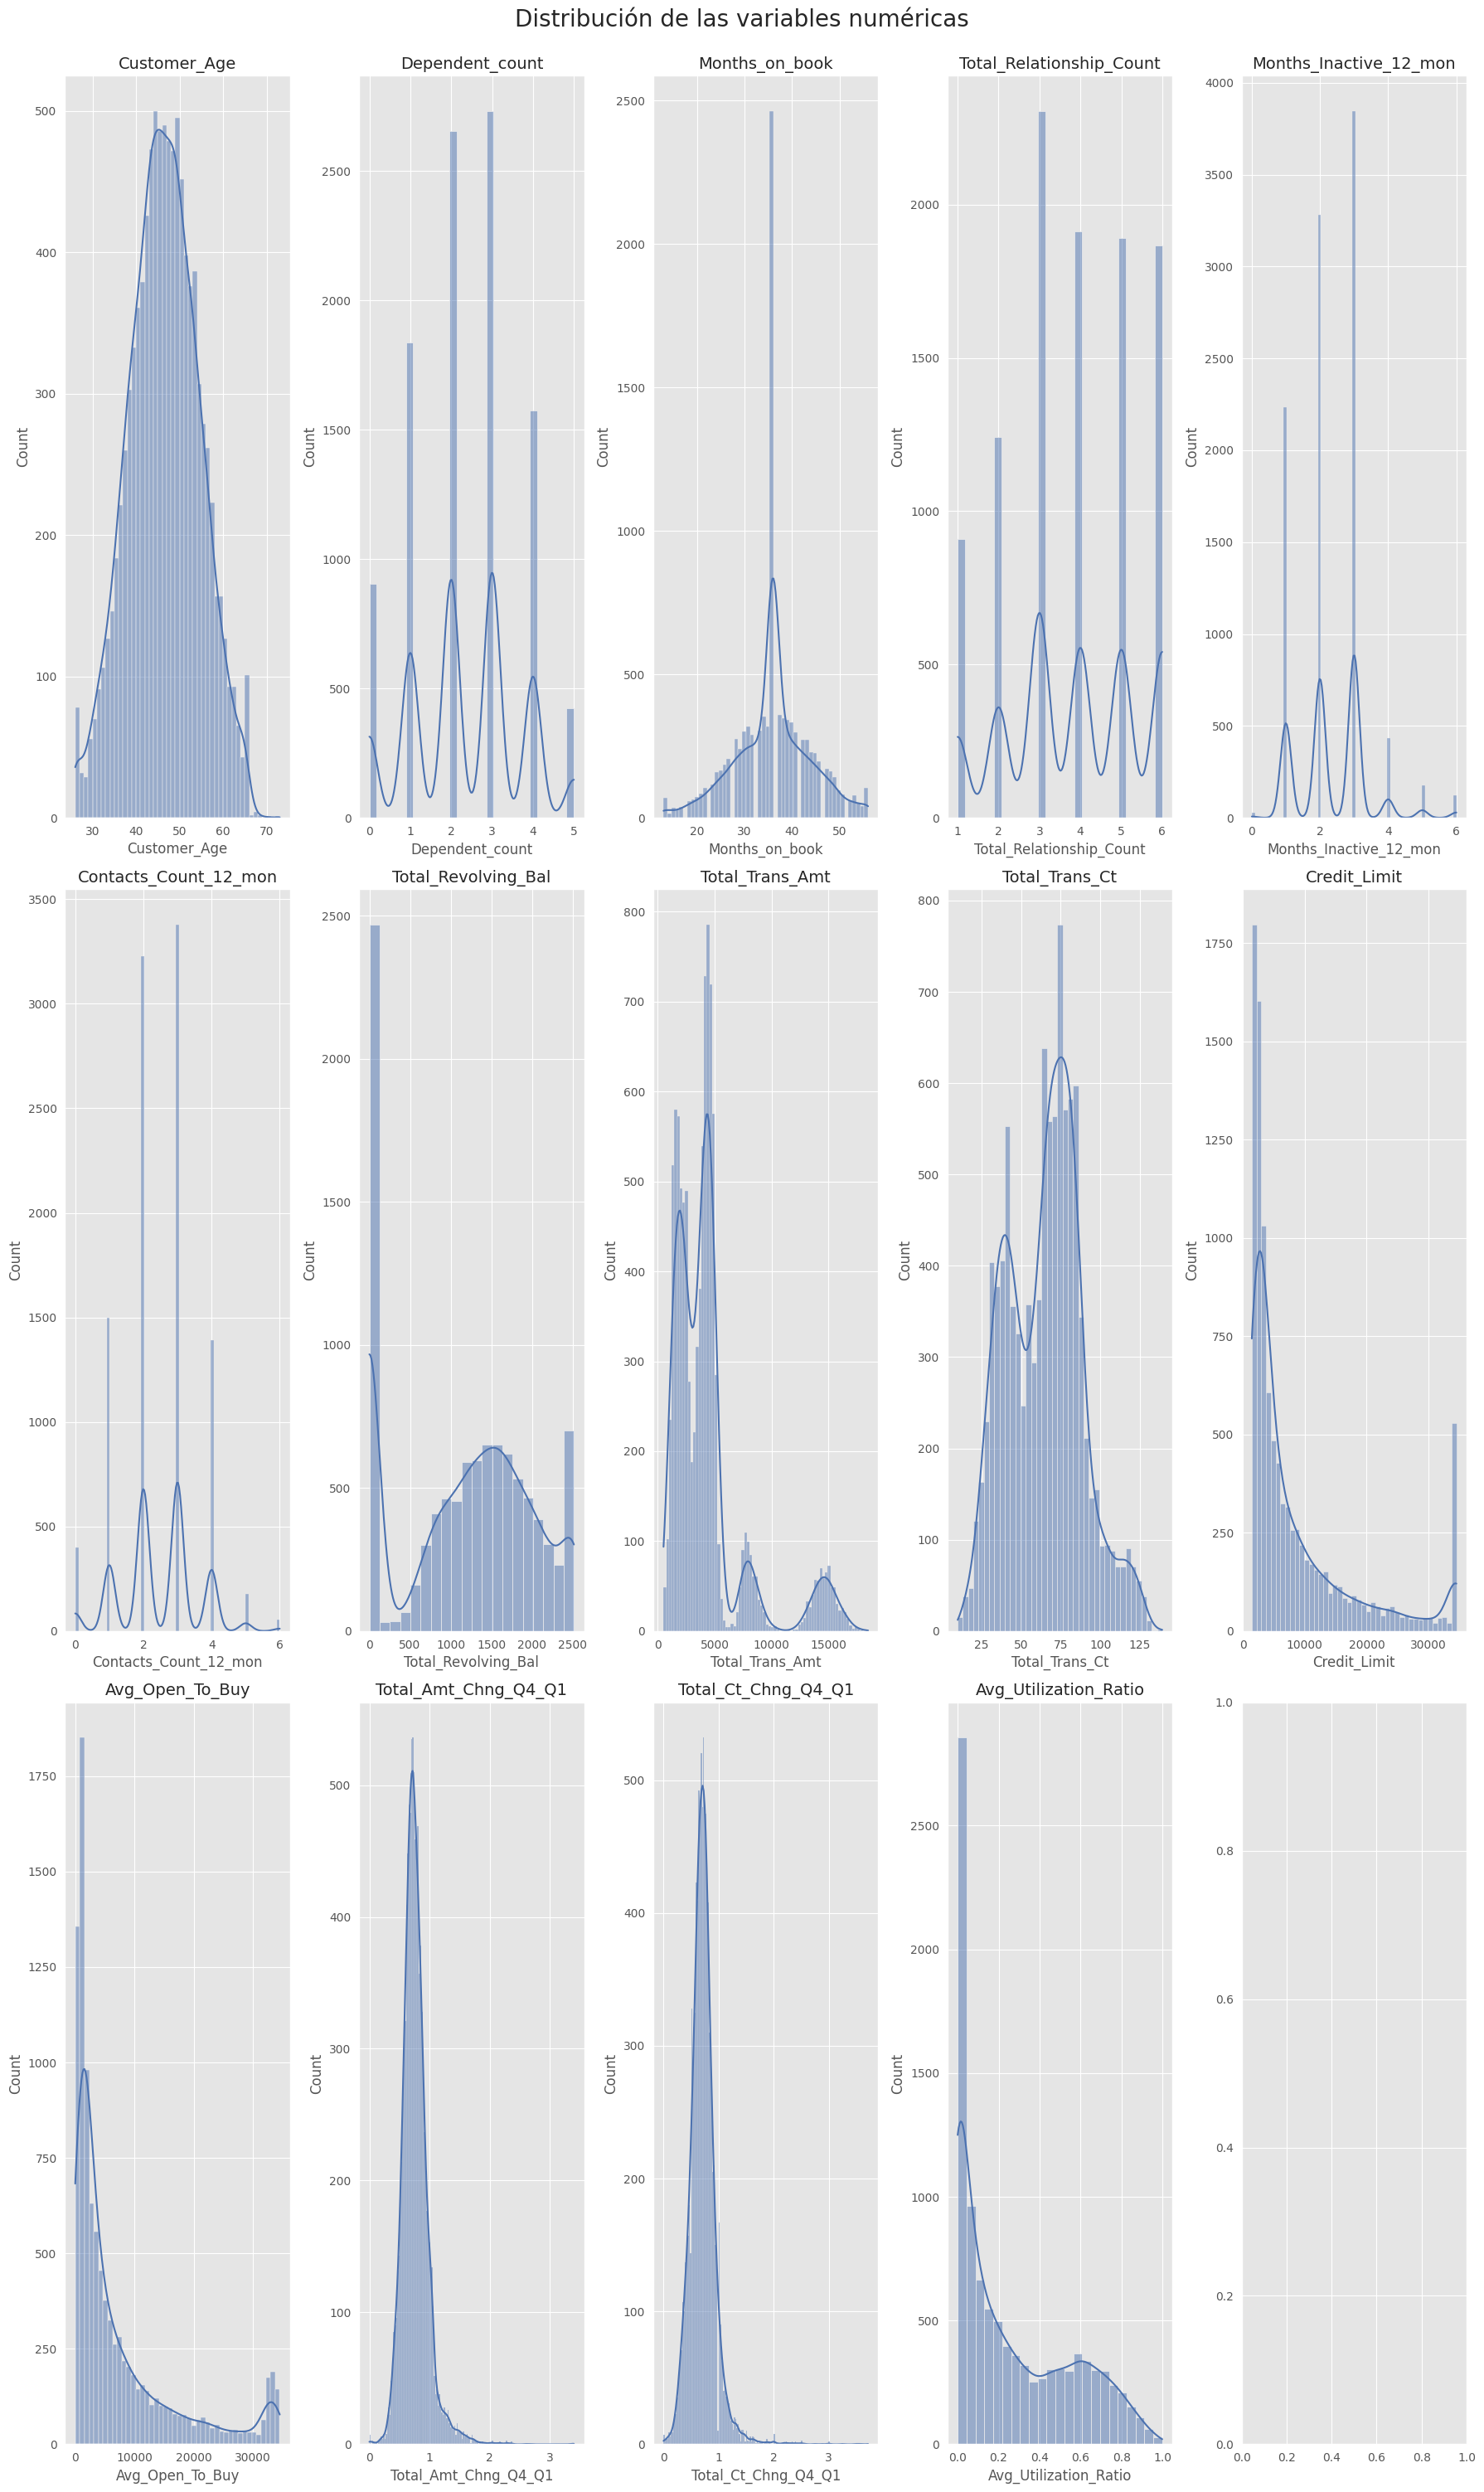

In [22]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(18, 30))
fig.suptitle('Distribución de las variables numéricas', fontsize=20, y=1.0)

# Variables numéricas
num_cols = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
'Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct',
'Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
for i, col in enumerate(num_cols):
    row = i // 5
    pos = i % 5
    if row<6:
        sns.histplot(x=col, data=data_clean, ax=axs[row][pos], kde=True, palette='pastel')
        axs[row][pos].set_title(col, fontsize=14)
        print(f'Media de {col}: {data_clean[col].mean()}')
plt.tight_layout()
plt.show()

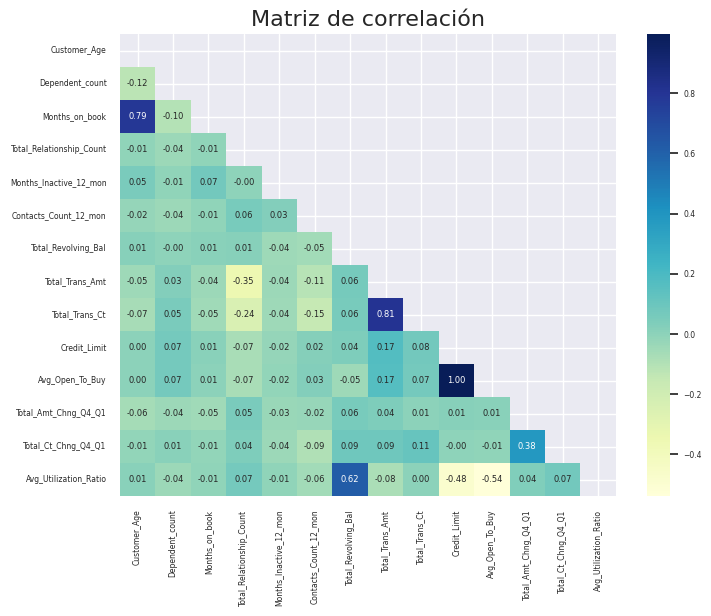

In [23]:
# Correlación entre variables numéricas
corr_matrix = data_clean[num_cols].corr()
# Obtener la matriz triangular inferior
# creating mask
mask = np.triu(np.ones_like(corr_matrix))
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))
sns.set(font_scale=0.5)
# Generar el heatmap usando seaborn
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="YlGnBu")
#sns.heatmap(corr_matrix, annot=True)
plt.title('Matriz de correlación', fontsize=16)
plt.show()

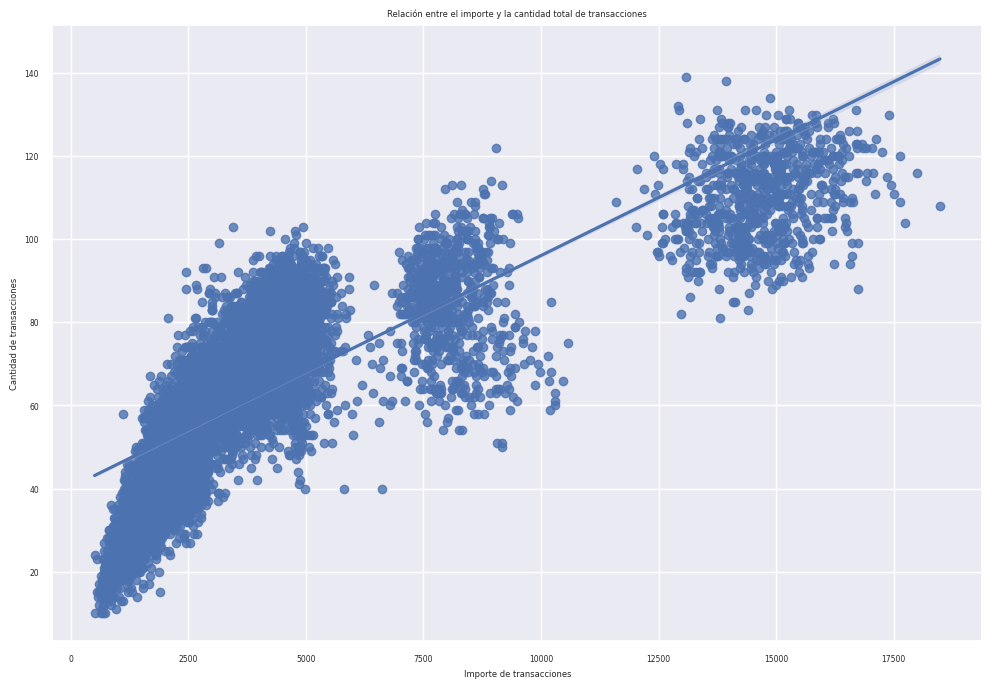

In [31]:
plt.figure(figsize=(12,8))
sns.regplot(x='Total_Trans_Amt',y='Total_Trans_Ct',data=data_clean)
plt.title('Relación entre el importe y la cantidad total de transacciones')
plt.xlabel('Importe de transacciones')
plt.ylabel('Cantidad de transacciones')
plt.show()

Se ve que se tiene algunos grupos subyacentes en nuestros datos; puede ser un experimento interesante intentar agrupar los diferentes grupos y ver las similitudes entre ellos y lo que describe mejor los diferentes grupos.

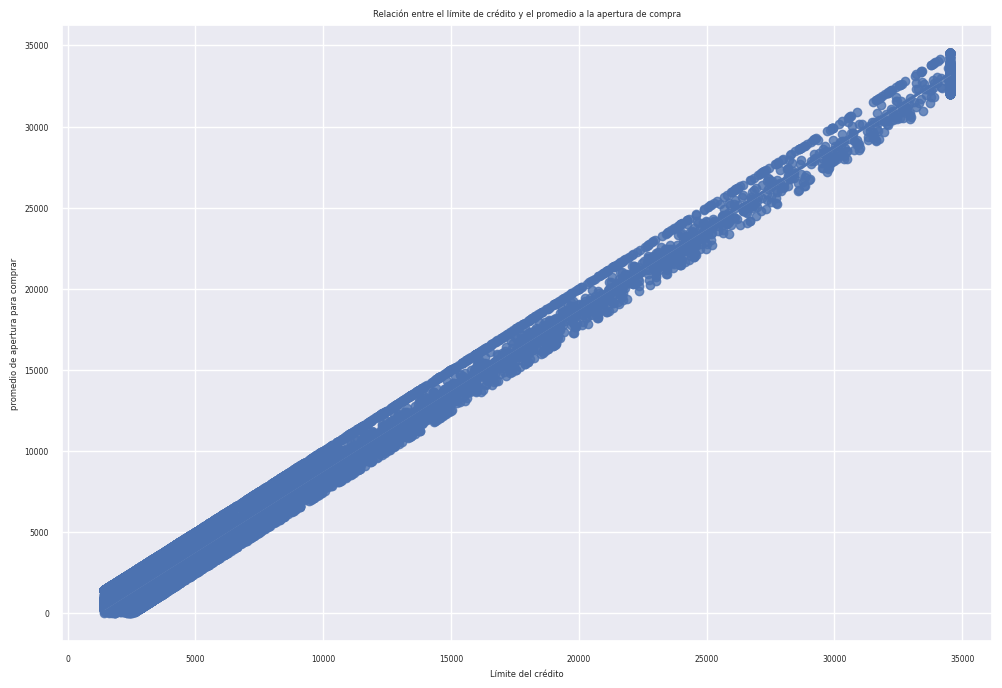

In [30]:
plt.figure(figsize=(12,8))
sns.regplot(x='Credit_Limit',y='Avg_Open_To_Buy',data=data_clean)
plt.title('Relación entre el límite de crédito y el promedio a la apertura de compra')
plt.xlabel('Límite del crédito')
plt.ylabel('promedio de apertura para comprar')
plt.show()

Si observamos esta relación vemos que es fuertemente correlacioada
 y positiva. A mayor crédito mayor es el promedio de compra de apertura.

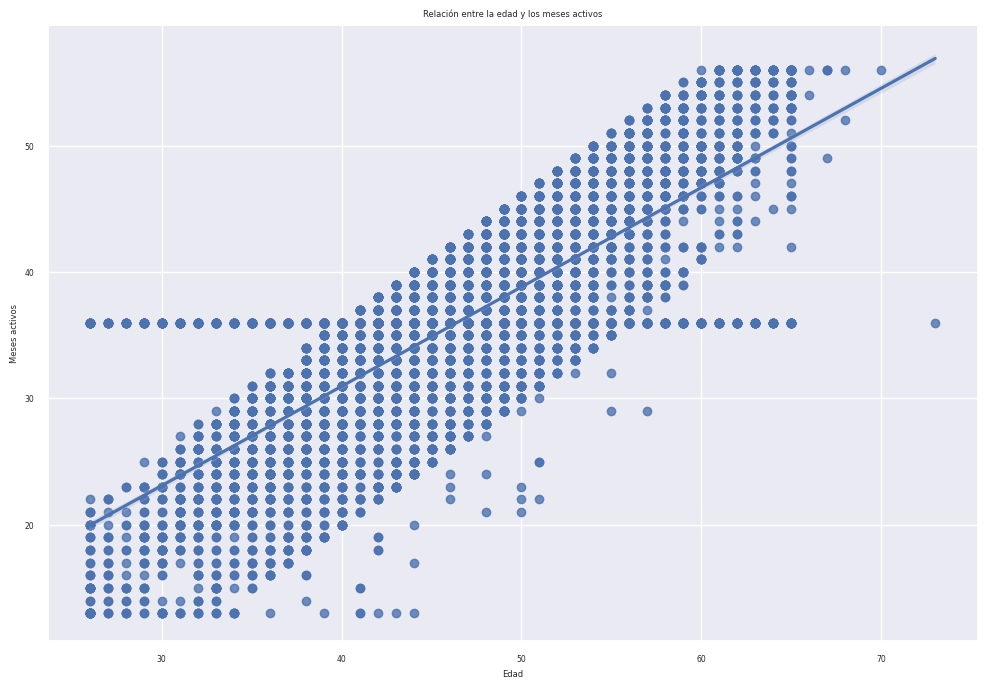

In [29]:
plt.figure(figsize=(12,8))
sns.regplot(x='Customer_Age',y='Months_on_book',data=data_clean)
plt.title('Relación entre la edad y los meses activos')
plt.xlabel('Edad')
plt.ylabel('Meses activos')
plt.show()

En el gráfico anterior se observa que hay una relación positiva, la mayoría de los puntos se comportan como a mayor edad mayor meses en el libro.

### 5.4 Relación entre las variables numéricas y la tasa de abandono

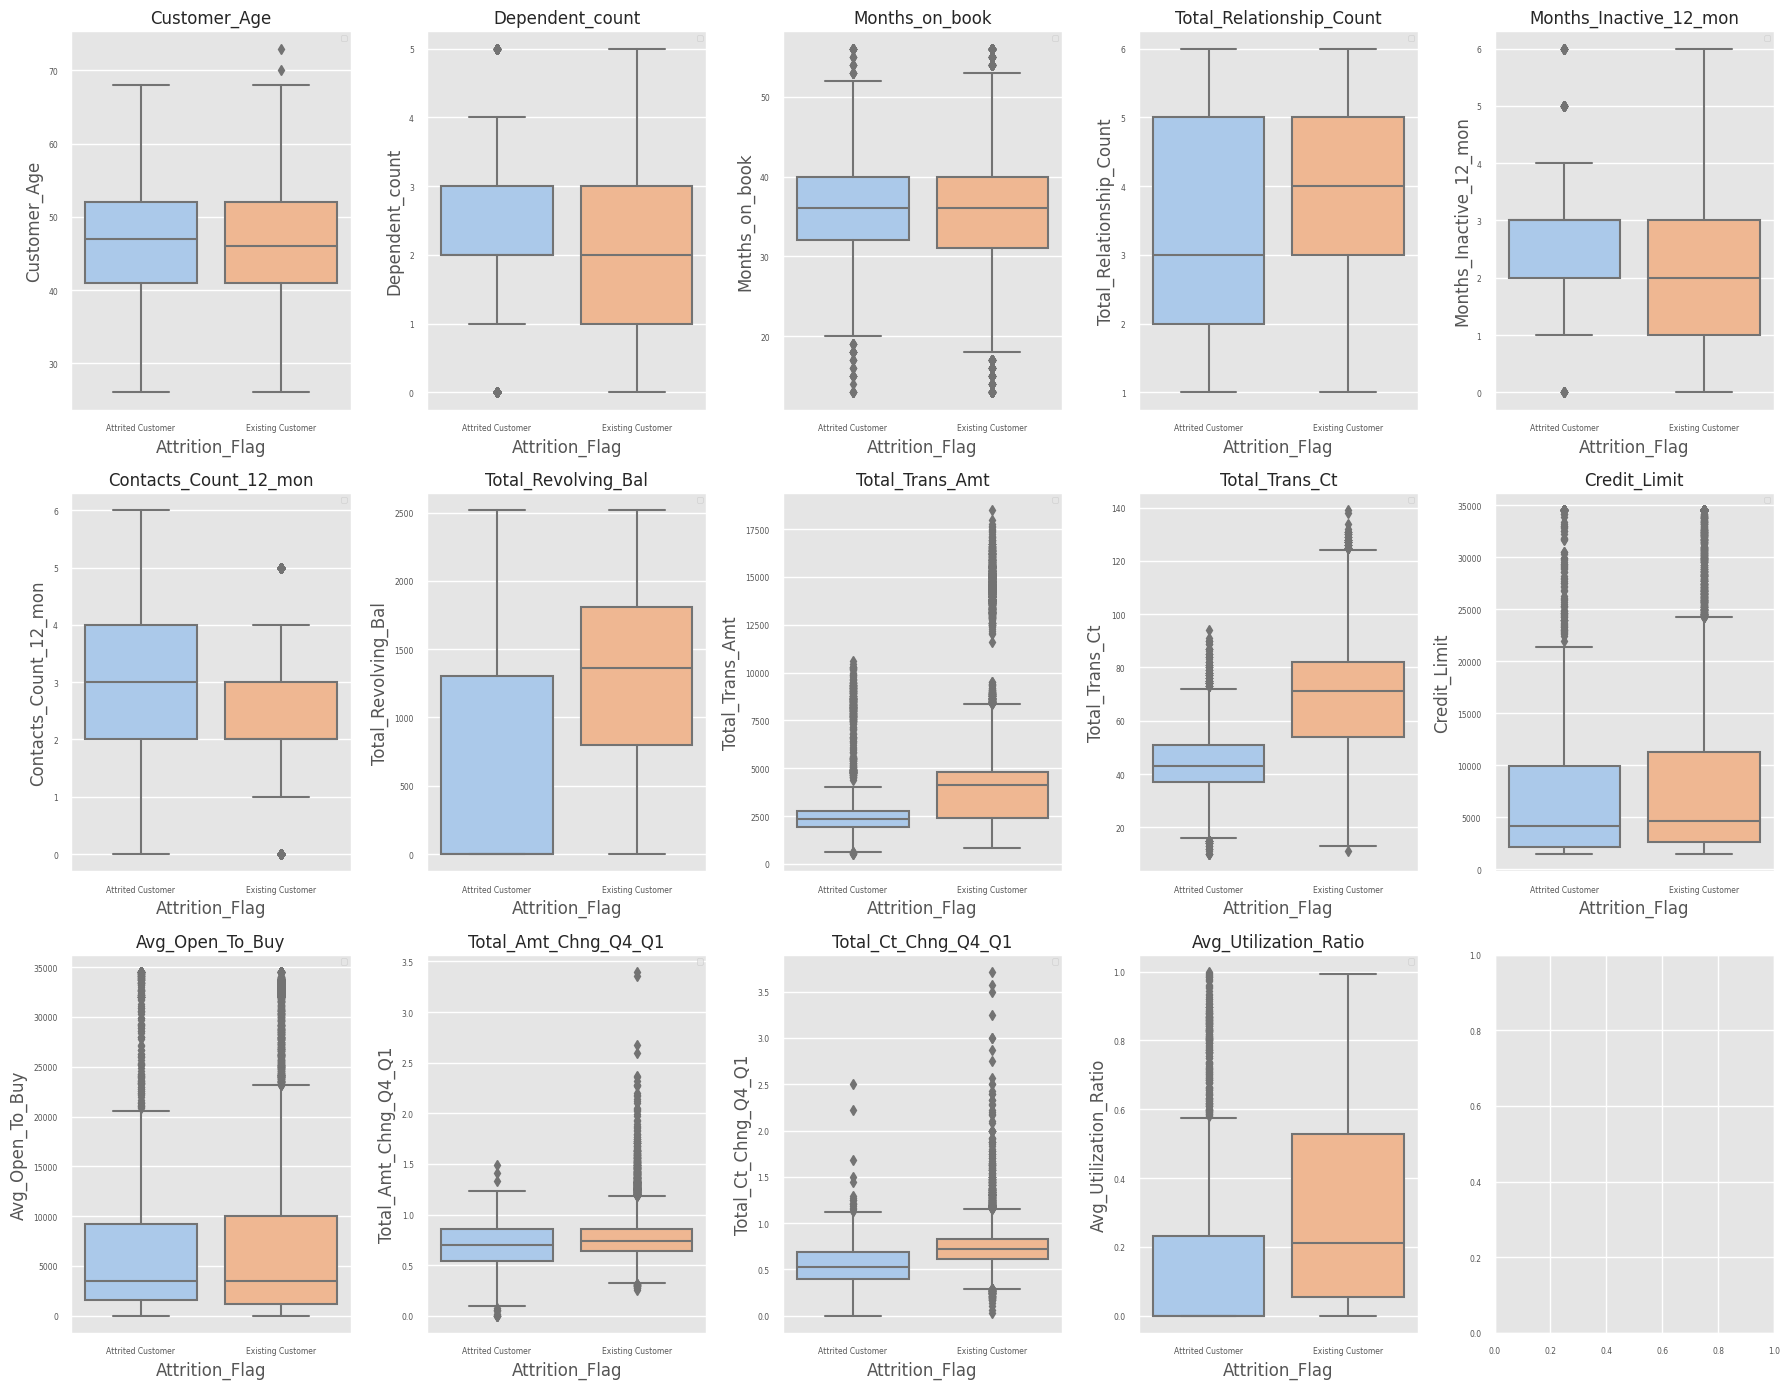

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(18, 14))
#fig.suptitle('Relación entre variables numéricas y tasa de abandono', fontsize=16)

for i, col in enumerate(num_cols):
    row = i // 5
    pos = i % 5
    if row<6:
        sns.boxplot(x='Attrition_Flag', y=col, data=data_clean, ax=axs[row][pos], palette='pastel')
        axs[row][pos].set_title(col, fontsize=12)
        axs[row][pos].legend(loc='upper right')

plt.tight_layout()
plt.show()

### 5.5 Distribución de variables categóricas

In [ ]:
#Seleccionamos las variables categóricas
for col in data_clean.select_dtypes('category').columns.to_list():
    print(col)


Attrition_Flag
Gender
Education_Level
Marital_Status
Income_Category
Card_Category
location


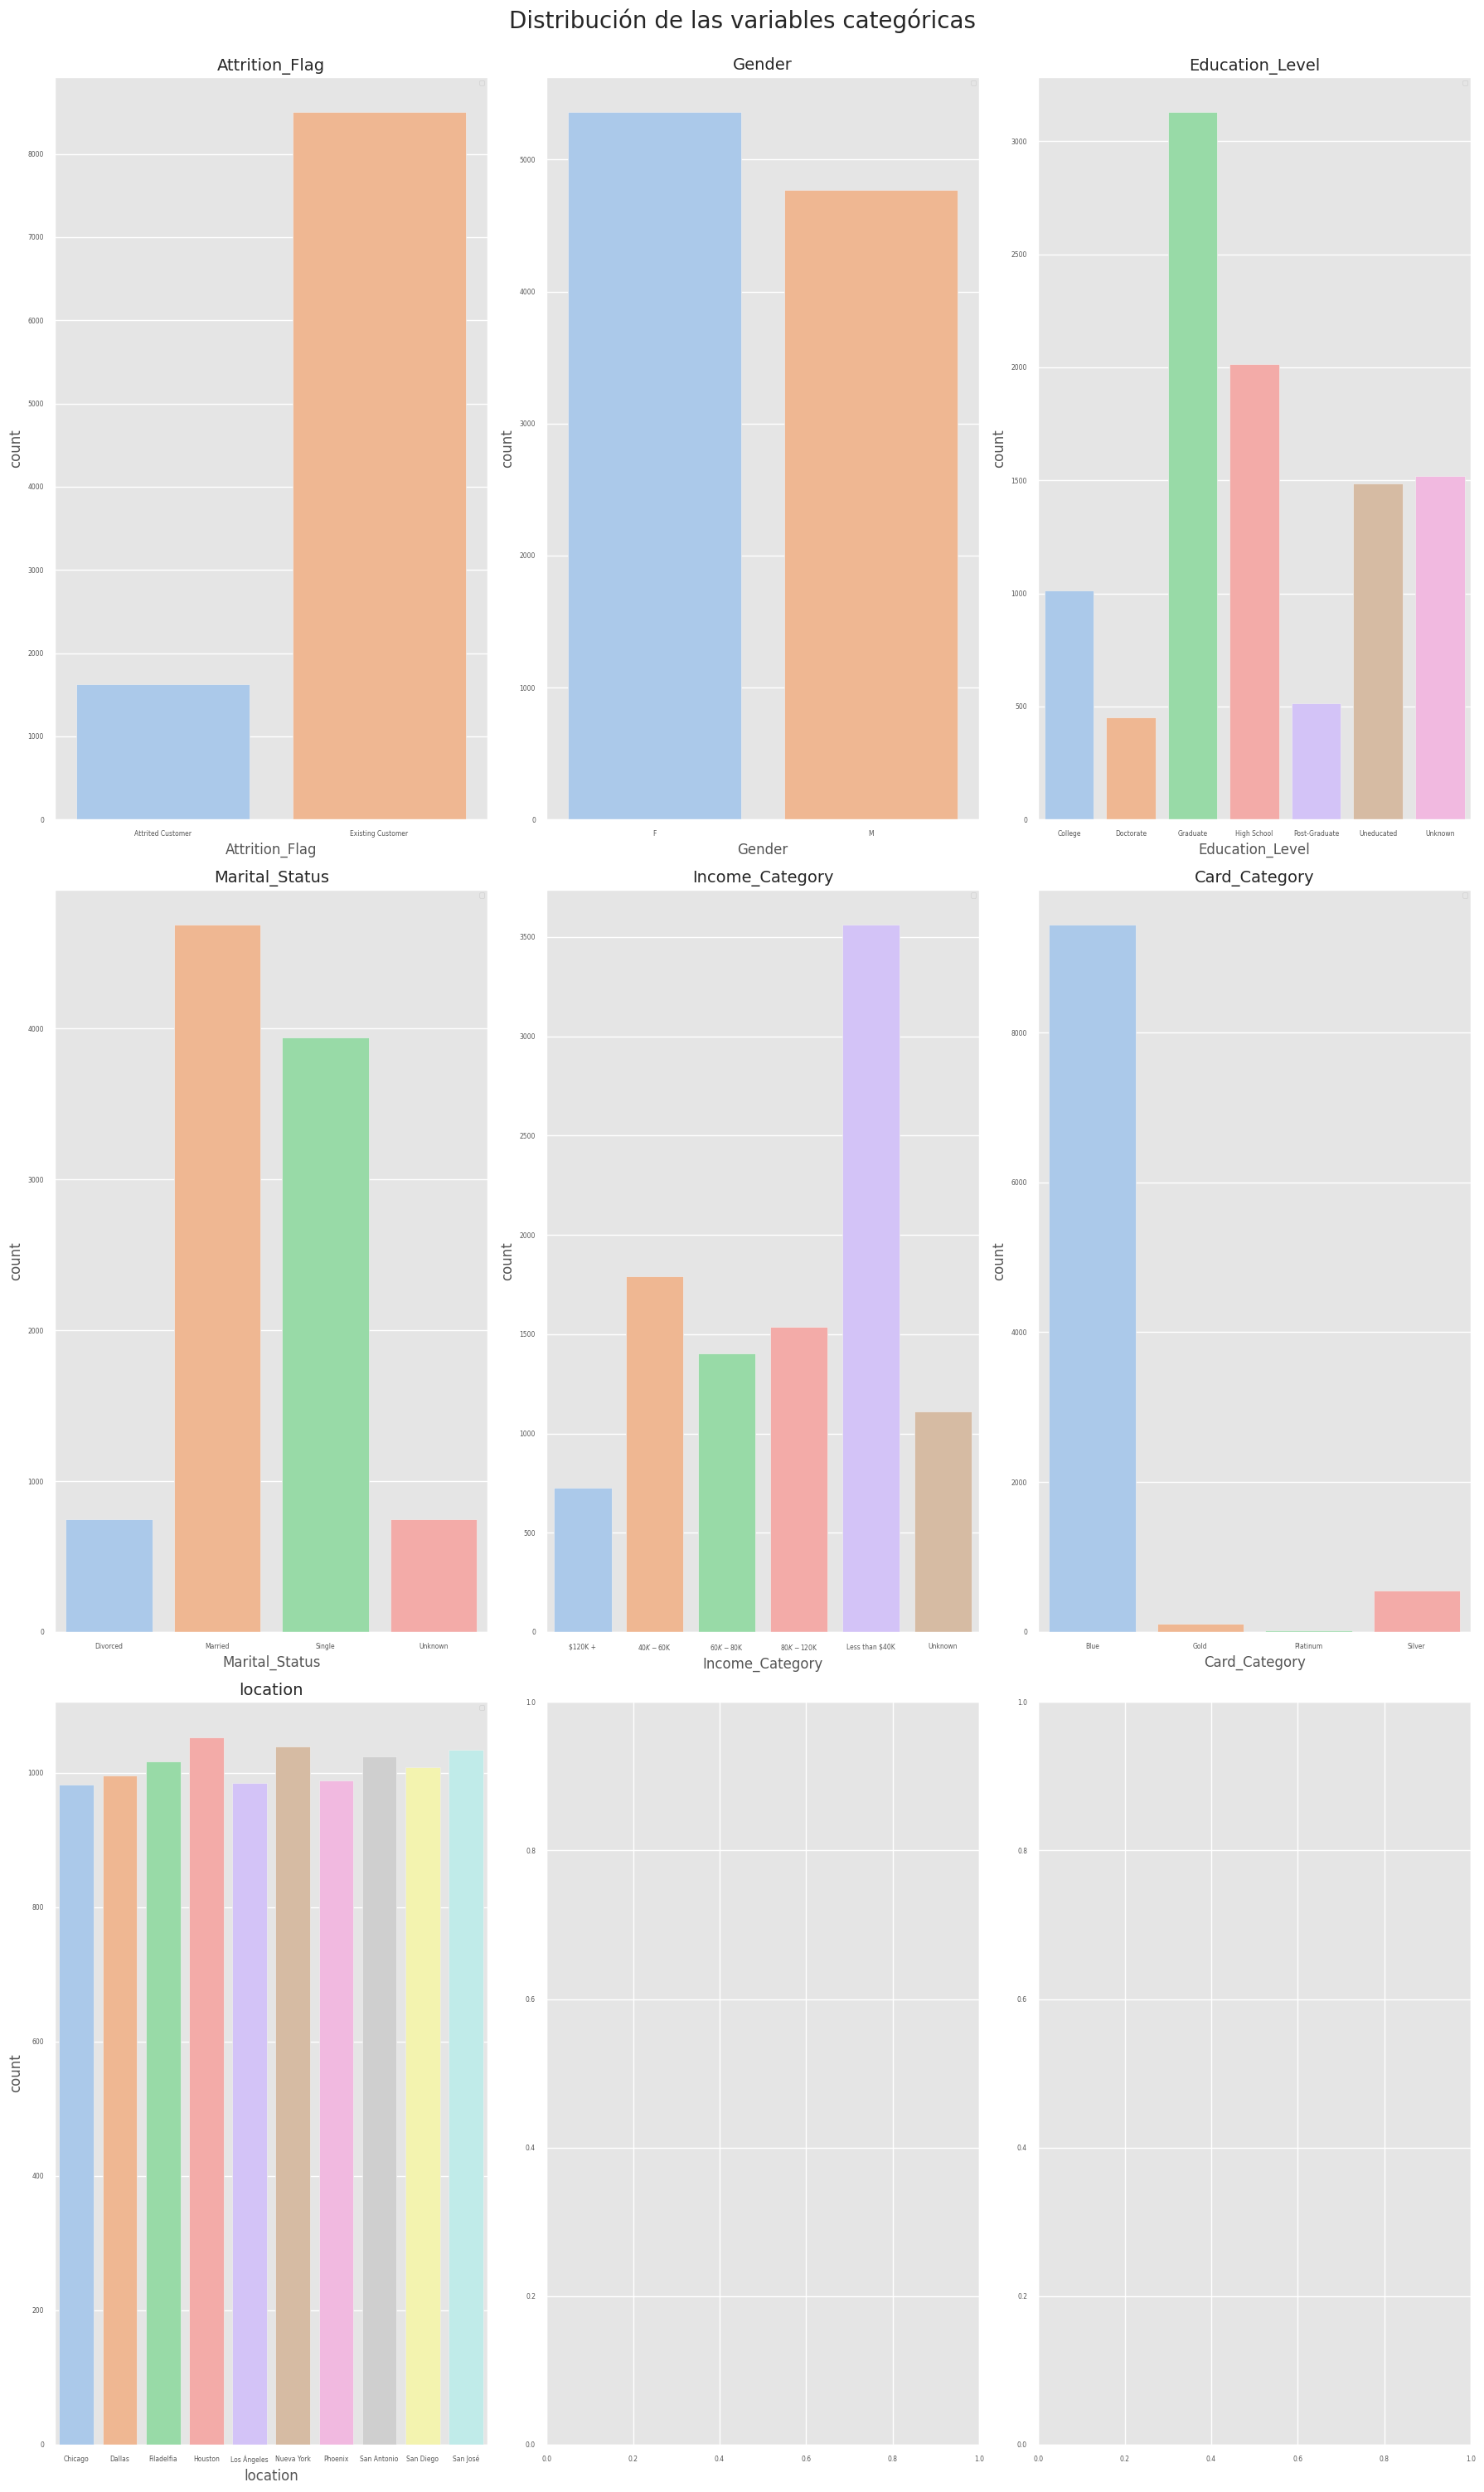

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 30))
fig.suptitle('Distribución de las variables categóricas', fontsize=20, y=1.0)

# Variables categóricas
cat_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category','location']
for i, col in enumerate(cat_cols):
    row = i // 3
    pos = i % 3
    if row<6:
        sns.countplot(x=col, data=data_clean, ax=axs[row][pos], palette='pastel')
        axs[row][pos].set_title(col, fontsize=14)

plt.tight_layout()
plt.show()

### 5.6 Relación entre las variables categóricas y la tasa de abandono

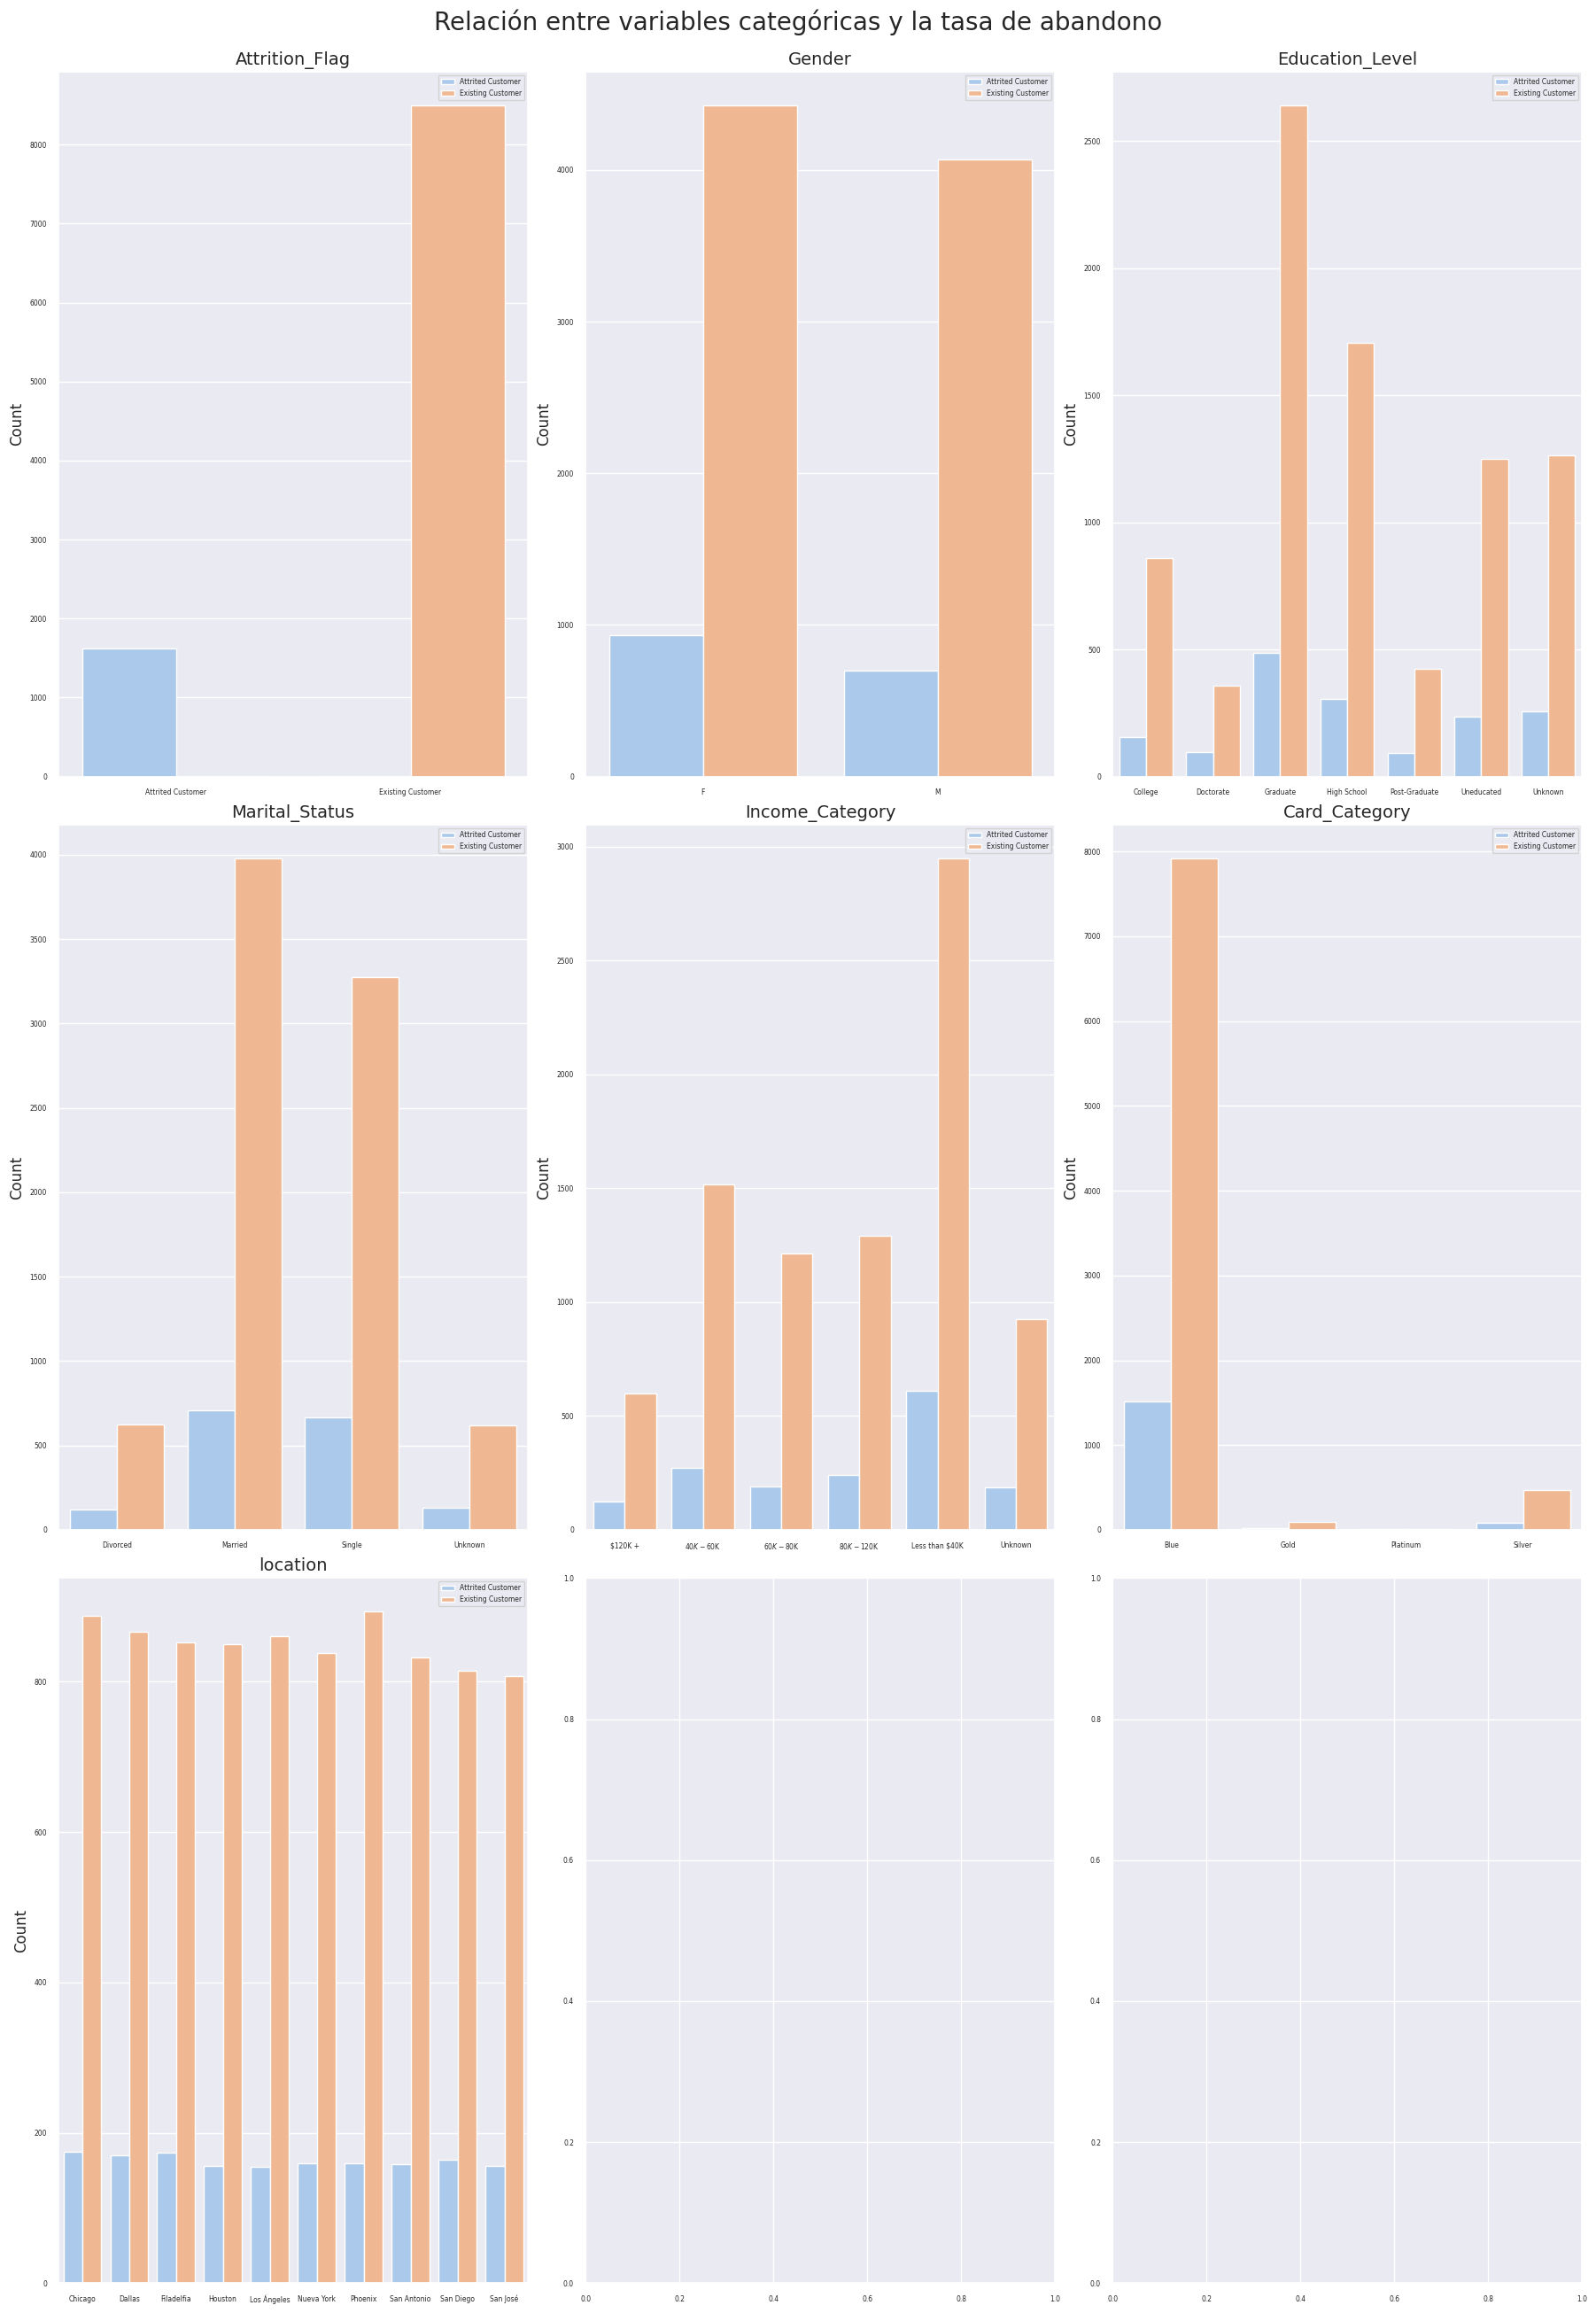

In [ ]:
df_cat = data_clean[['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category','location']]

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 26))
fig.suptitle('Relación entre variables categóricas y la tasa de abandono', fontsize=20, y=1.0)

for i, col in enumerate(cat_cols):
    row = i // 3
    pos = i % 3
    sns.countplot(x=col, hue='Attrition_Flag', data=df_cat, ax=axs[row][pos], palette='pastel')
    axs[row][pos].set_title(col, fontsize=14)
    axs[row][pos].set_xlabel('')
    axs[row][pos].set_ylabel('Count', fontsize=12)
    axs[row][pos].legend(loc='upper right')

plt.tight_layout()
plt.show()

### 5.7 Tasa de abandono

In [ ]:
total_customers = df_bank['CLIENTNUM'].nunique()
Attrited_customers = df_bank[df_bank['Attrition_Flag'] == 'Attrited Customer']['CLIENTNUM'].nunique()
Attrited_rate = Attrited_customers / total_customers
print('Tasa de abandono: {:.2%}'.format(Attrited_rate))

Tasa de abandono: 16.07%


### 5.8 Análisis sobre las preguntas de investigación

Luego de analizar los datos, se puede ver que una porporción muy pequeña de las muestras de datos representan a clientes que abandonan. Este caso hay que tener cuidado, ya que la variable target está desbalanceada. Debemos considerar alguna metodología para salvar dicho problema.
Además se observa que hay factores que influyen en la tasa de abandono del cliente. Por ejemplo, se identificó que quienen abandonan realizan transacciones de mucho menos monto que los clientes existentes, las cantidad de las mismas también es menor que la de los clientes existentes. Es aquí que uno podría pensar que realiza los clientes que abandona utilizan menos sus tarjetas, y por ende se podría pensar que también utilizan menos su línea de crédito.


***Pregunta: ¿Los clientes que realizan menos transacciones tienen más probabilidades de darse de baja?***

En esta hipótesis se analiza si los clientes que realizan menos transacciones tienen más probabilidades de darse de baja. En primer lugar, veamos los niveles generales de transacciones.

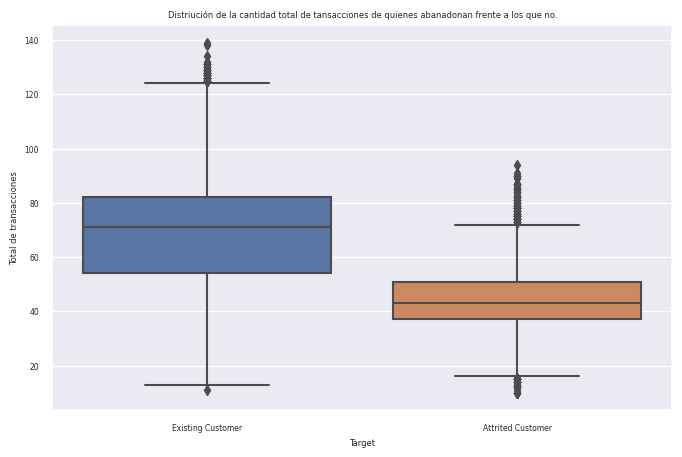

In [ ]:
fig, px = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df_final, y='Total_Trans_Ct', x='Attrition_Flag')
px.set_title('Distriución de la cantidad total de tansacciones de quienes abanadonan frente a los que no.')
px.set_xlabel('Target')
px.set_ylabel('Total de transacciones')

plt.show;

A partir del análisis del boxplot se considera que existe una diferencia real entre la cantidad promedio de transacciones de clientes activos y la de clientes no activos.

Se puede observar que quienen abandonan realizan muchas menos transacciones que los clientes existentes. Pero, ¿se debe a una disminución de las transacciones o siempre han realizado menos transacciones?

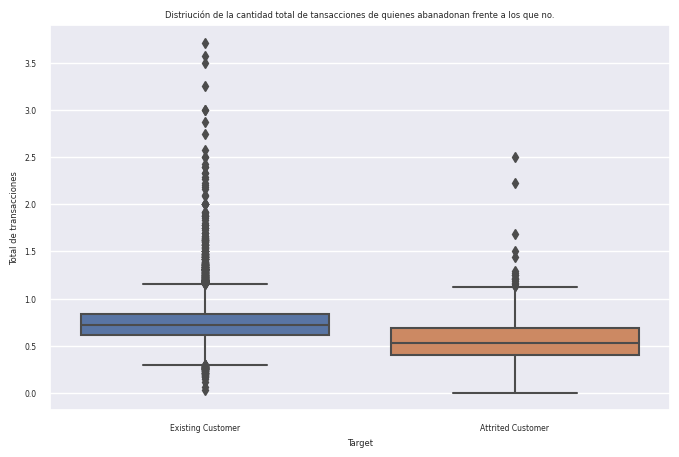

In [ ]:
fig, px = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df_final, y='Total_Ct_Chng_Q4_Q1', x='Attrition_Flag')
px.set_title('Distriución de la cantidad total de tansacciones de quienes abanadonan frente a los que no.')
px.set_xlabel('Target')
px.set_ylabel('Total de transacciones')

plt.show;

Aquí se puede considerar que existe una diferencia real entre el promedio del cambio de la cantidad de transacciones de los clientes activos y el de no activos.

***Pregunta: ¿Los clientes que se dan de baja utilizarán menos su línea de crédito?***

Teniendo en cuenta lo que hemos visto en los datos transaccionales, nuestra siguiente hipótesis es que los clientes que se dan de baja tienen una menor utilización. Esto significa que utilizan menos su línea de crédito con el banco. Lo primero que se quiere que comprobar es si se le da a estos clientes una línea de crédito similar

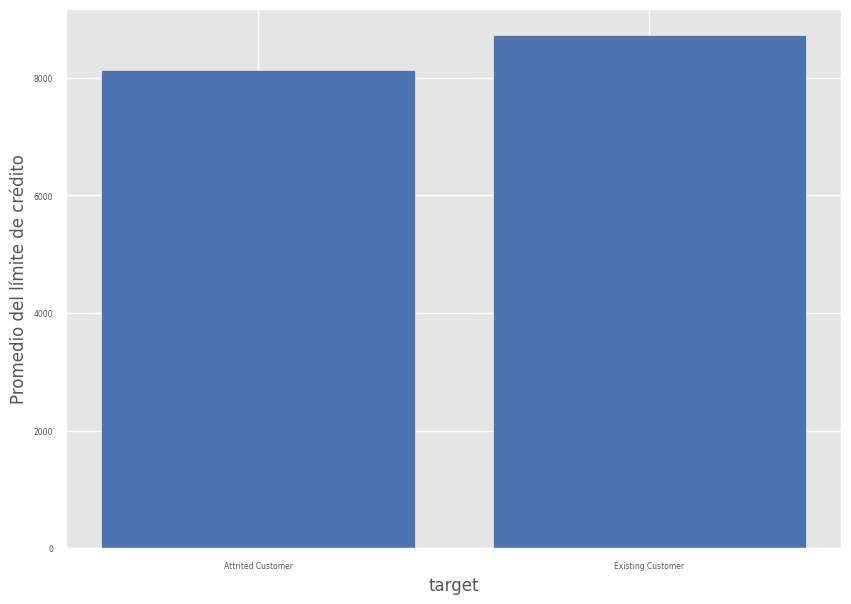

In [ ]:
dfline = df_final.groupby('Attrition_Flag').agg({'Credit_Limit':'mean'})


#Build the bar chart
# Figure Size
fig= plt.figure(figsize =(10, 7))

plt.bar(dfline.index,dfline['Credit_Limit'])
# Configurar las etiquetas y el título del gráfico
plt.xlabel('target')
plt.ylabel('Promedio del límite de crédito')
#plt.title("Promedio del crédito de línea")

# Show Plot
plt.show()



No parece que se le ofrezca una línea más baja a los clientes dados de baja, así que ahora se analiza si utilizan menos su línea.

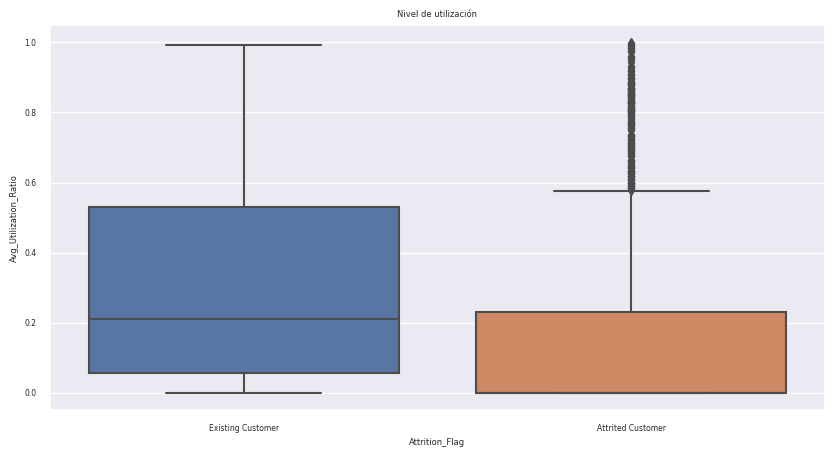

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_final, x="Attrition_Flag", y="Avg_Utilization_Ratio")
plt.title('Nivel de utilización')
plt.show;

Podemos ver claramente que la distribución de quienes abandonan está sesgada al 0% de utilización, es decir, que no utilizan su tarjeta en absoluto.

***Pregunta: ¿El cliente que abandona ha estado inactivo durante más tiempo que los clientes que permanecen?***

Dado que la base de bajas utiliza menos la tarjeta, ¿tienen un periodo de inactividad prolongado

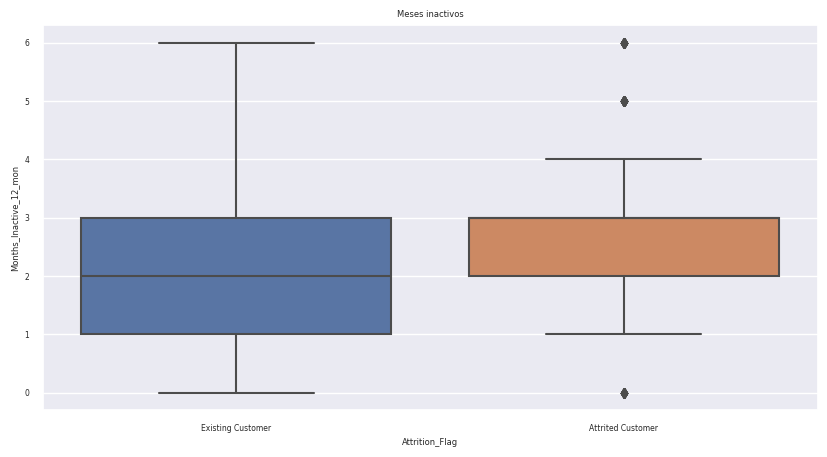

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_final, x="Attrition_Flag", y="Months_Inactive_12_mon")
plt.title('Meses inactivos')
plt.show;

Parece que los que abandonan tienen un mayor número de meses inactivos que los clientes que se quedan. Los datos están menos distribuidos que los clientes que se quedan.

### 5.9 Informe

En el conjunto de datos a analizar se identificaron algunas características generales del conjunto de datos. Este consta de 10127 observaciones y 24 variables, incluyendo información demográfica de los clientes, status civil, nivel de educación, información sobre los productos contratados, la duración,  las tansacciones (monto y cantidad), la línea de credito,  la tasa de abandono, entre otros.

Se observó que la tasa de abandono en el conjunto de datos es de aproximadamente el 16,07%. Además, se encontró a que la edad promedio es aproximadamente 46 año.Además, el tiempo promedio que están activos es aproximadamente 3 años.Un cliente tiene, en promedio, un límite de crédito de \$8632, y se le renueva un saldo de \$1163.
El monto total de trnasacciones es, en promedio, de 4404 pesos, con una cantidad total de 64 transacciones.

Además, en nuestro dataset se cuenta con clientes del género femenino y masculino, contando con un total de 5358 clientes femeninos. Además, hay 7 niveles de educación, en donde 3128 clientes son graduados, con 4 estado civiles, contando con 4687 clientes casados.
En la categoría de ingresos, hay 6 categorías y se cuentan con 3561 clientes que tienen un ingreso menor al \$3561.
Y por último, en la categoría de tipos de tarjetas, la tarjeta "Blue" cuenta con 9436 clientes.

Por último, vale mencionar que los factores que influyen en la  tasa de abandono son la cantidad y el monto de las tansacciones, y los meses inactivos que están aquellos clientes que abandonan.

## 6. Pre - procesamiento (Parte II)

### 6.1 Variable dummy

In [ ]:
code = {'Existing Customer':0, 'Attrited Customer':1}
data_clean['Attrition_Flag'] = data_clean['Attrition_Flag'].map(code)

y = data_clean['Attrition_Flag']
X = data_clean.drop('Attrition_Flag',errors='ignore',axis=1)

### 6.2 Label encoding

In [ ]:
# Imprime las categorías por columnas categóricas
for col in X.select_dtypes('category').columns.to_list():
    print(col + ': '+ str(X[col].cat.categories.to_list()))


# https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

features_to_encode = X.select_dtypes('category').columns.to_list()
for feature in features_to_encode:
    X = encode_and_bind(X, feature)

X.info()

Gender: ['F', 'M']
Education_Level: ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown']
Marital_Status: ['Divorced', 'Married', 'Single', 'Unknown']
Income_Category: ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown']
Card_Category: ['Blue', 'Gold', 'Platinum', 'Silver']
location: ['Chicago', 'Dallas', 'Filadelfia', 'Houston', 'Los Ángeles', 'Nueva York', 'Phoenix', 'San Antonio', 'San Diego', 'San José']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10254537
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    10127 non-null  int64  
 1   Dependent_count                 10127 non-null  int64  
 2   Months_on_book                  10127 non-null  int64  
 3   Total_Relationship_Count        10127 non-null  int64  
 4   Months_Inactive_12_mon         